In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [5]:
environments = ["Ant-v4","HalfCheetah-v4","Hopper-v4","Humanoid-v4","Walker2d-v4"]
#environments = ["Humanoid-v4"]
policies = ["OurDDPG","TD3","SPG"]#,"SPGTD3"]
timesteps = np.arange(0,1e6,5000,dtype=np.int32)

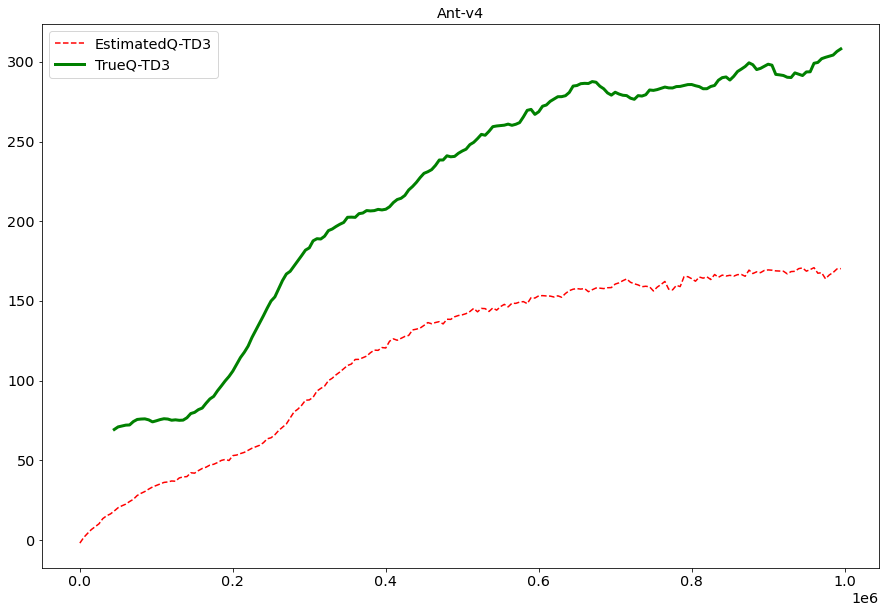

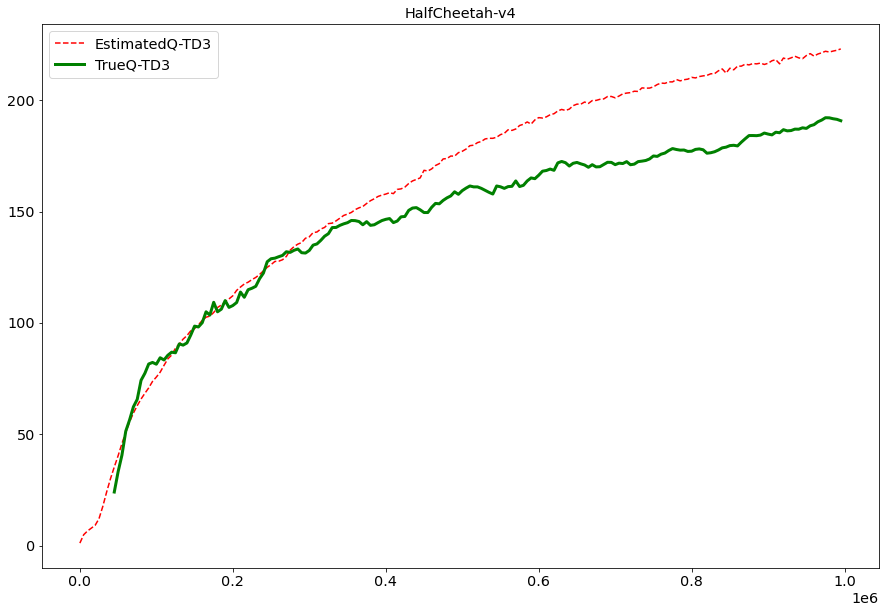

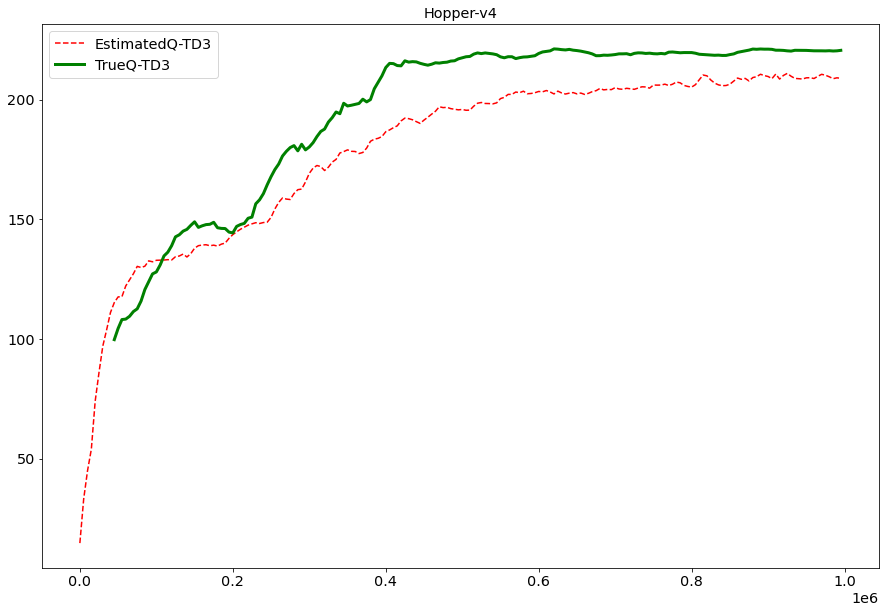

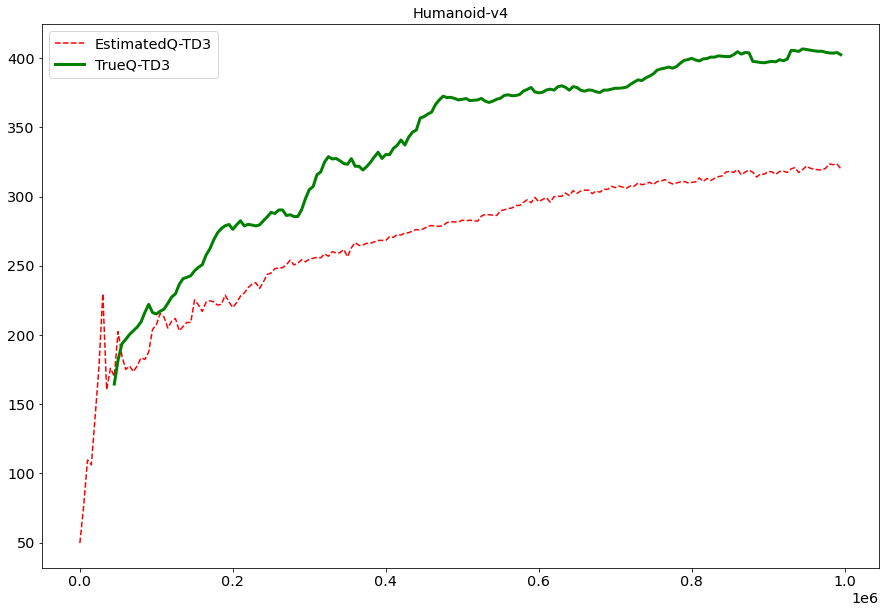

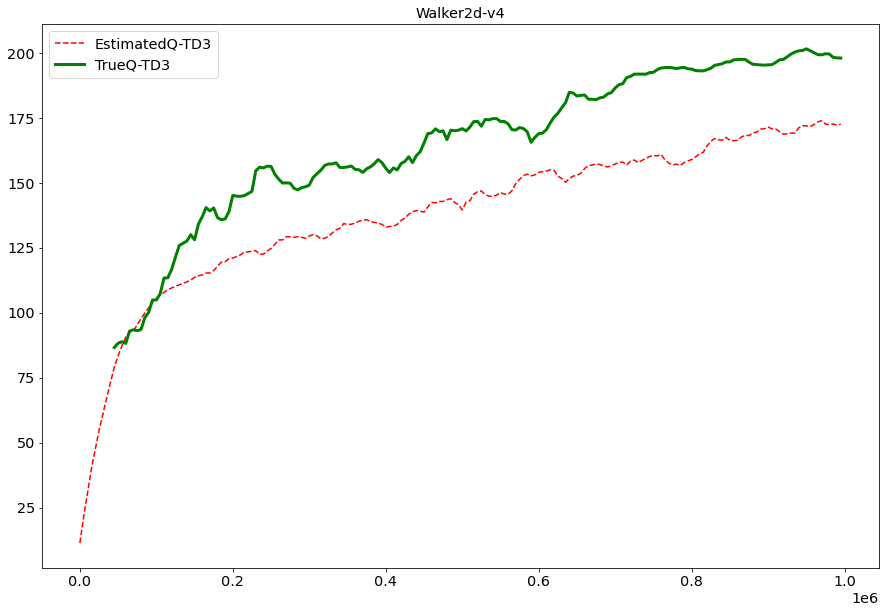

In [8]:
for environment in environments:
    respective_estimated_mean_result = []
    respective_estimated_std_result = []
    respective_true_mean_result = []
    for x in range(len(policies)):
        policy = policies[x]
        dir_path = "results/"+environment+"/"+policy+"/"

        results = []
        for path in os.listdir(dir_path):
            if os.path.isfile(os.path.join(dir_path, path)):
                results.append(path)

        required_estimated_result = []
        required_true_result = []

        for result in results:
            if("estimated" in result):
                required_estimated_result.append(result)
            if("true" in result):
                required_true_result.append(result)

        all_estimated_results = pd.DataFrame(columns=["run_0","run_1","run_2","run_3","run_4","mean","std"])
        all_true_results = pd.DataFrame(columns=["run_0","run_1","run_2","run_3","run_4","mean","std"])

        for i in range(len(required_estimated_result)):
            try:
                all_estimated_results["run_0"] = np.load(dir_path+required_estimated_result[i]).reshape(-1)
                all_estimated_results["run_1"] = np.load(dir_path+required_estimated_result[i]).reshape(-1)
                all_estimated_results["run_2"] = np.load(dir_path+required_estimated_result[i]).reshape(-1)
                all_estimated_results["run_3"] = np.load(dir_path+required_estimated_result[i]).reshape(-1)
                all_estimated_results["run_4"] = np.load(dir_path+required_estimated_result[i]).reshape(-1)
                all_estimated_results["mean"] = all_estimated_results.mean(axis=1)
                all_estimated_results["std"] = all_estimated_results.std(axis=1)

                all_true_results["run_0"] = np.load(dir_path+required_true_result[i]).reshape(-1)
                all_true_results["run_1"] = np.load(dir_path+required_true_result[i]).reshape(-1)
                all_true_results["run_2"] = np.load(dir_path+required_true_result[i]).reshape(-1)
                all_true_results["run_3"] = np.load(dir_path+required_true_result[i]).reshape(-1)
                all_true_results["run_4"] = np.load(dir_path+required_true_result[i]).reshape(-1)
                all_true_results["mean"] = all_true_results.mean(axis=1)
                all_true_results["std"] = all_true_results.std(axis=1)

            except Exception as e:
                print(e)
                continue

        final_df = pd.DataFrame(columns=["estimated_Q_mean","estimated_Q_std","True_Q_mean","True_Q_std"])
        final_df["estimated_Q_mean"] = all_estimated_results["mean"]
        final_df["estimated_Q_std"] = all_estimated_results["std"]
        final_df["True_Q_mean"] = all_true_results["mean"]
        final_df["True_Q_std"] = all_true_results["std"]

        filtered_estimated_mean = final_df["estimated_Q_mean"].rolling(1).mean()
        estimated_mean_array = filtered_estimated_mean.to_numpy()
        respective_estimated_mean_result.append(estimated_mean_array)


        filtered_true_mean = final_df["True_Q_mean"].rolling(10).mean()
        true_mean_array = filtered_true_mean.to_numpy()
        respective_true_mean_result.append(true_mean_array)

        std_array = final_df["estimated_Q_std"].to_numpy()
        respective_estimated_std_result.append(std_array)

    #std_array = all_results["std"].to_numpy()

    plt.figure(figsize=(15,10))
    plt.title(label=environment)
    #plt.plot(timesteps,respective_estimated_mean_result[0],label = "EstimatedQ-DDPG",color="r",linestyle='dashed')
    #plt.plot(timesteps,respective_true_mean_result[0],label = "TrueQ-DDPG",color="g",linewidth=3)

    plt.plot(timesteps,respective_estimated_mean_result[1],label = "EstimatedQ-TD3",color="r",linestyle='dashed')
    plt.plot(timesteps,respective_true_mean_result[1],label = "TrueQ-TD3",color="g",linewidth=3)

    #plt.plot(timesteps,respective_estimated_mean_result[2],label = "EstimatedQ-SPG",color="r",linestyle='dashed')
    #plt.plot(timesteps,respective_true_mean_result[2],label = "TrueQ-SPG",color="g",linewidth=3)

    #plt.plot(timesteps,respective_estimated_mean_result[3],label = "EstimatedQ-SPGTD3",color="r",linestyle='dashed')
    #plt.plot(timesteps,respective_true_mean_result[3],label = "TrueQ-SPGTD3",color="g",linewidth=3)

    
    #plt.fill_between(timesteps,
                         #respective_estimated_mean_result[0] - respective_estimated_std_result[0],
                         #respective_estimated_mean_result[0] + respective_estimated_std_result[0],
                        #alpha=0.2,color="g")
    #plt.fill_between(timesteps,
    #                 respective_estimated_mean_result[1] - respective_estimated_std_result[1],
    #                 respective_estimated_mean_result[1] + respective_estimated_std_result[1],
    #                alpha=0.2,color="r")
    #plt.fill_between(timesteps,
    #                 respective_estimated_mean_result[2] - respective_estimated_std_result[2],
    #                 respective_estimated_mean_result[2] + respective_estimated_std_result[2],
    #                alpha=0.2,color="b")

    plt.legend(loc="upper left")
    #plt.show()
    plt.savefig("Images/OB_TD3_"+environment+".png", bbox_inches='tight')

In [ ]:
plt.figure(figsize=(15,10))
plt.title(label=environment)
plt.plot(timesteps,respective_estimated_mean_result[0],label = "EstimatedQ-OurDDPG",color="g",linewidth=3)
plt.plot(timesteps,respective_true_mean_result[0],label = "TrueQ-OurDDPG",color="g",linestyle='dashed')

plt.plot(timesteps,respective_estimated_mean_result[1],label = "EstimatedQ-TD3",color="r",linewidth=3)
plt.plot(timesteps,respective_true_mean_result[1],label = "TrueQ-TD3",color="r",linestyle='dashed')

plt.plot(timesteps,respective_estimated_mean_result[2],label = "EstimatedQ-SPG",color="b",linewidth=3)
plt.plot(timesteps,respective_true_mean_result[2],label = "TrueQ-SPG",color="b",linestyle='dashed')

plt.fill_between(timesteps,
                     respective_estimated_mean_result[0] - respective_estimated_std_result[0],
                     respective_estimated_mean_result[0] + respective_estimated_std_result[0],
                    alpha=0.2,color="g")
plt.fill_between(timesteps,
                 respective_estimated_mean_result[1] - respective_estimated_std_result[1],
                 respective_estimated_mean_result[1] + respective_estimated_std_result[1],
                alpha=0.2,color="r")
plt.fill_between(timesteps,
                 respective_estimated_mean_result[2] - respective_estimated_std_result[2],
                 respective_estimated_mean_result[2] + respective_estimated_std_result[2],
                alpha=0.2,color="b")

plt.legend(loc="upper left")
plt.show()

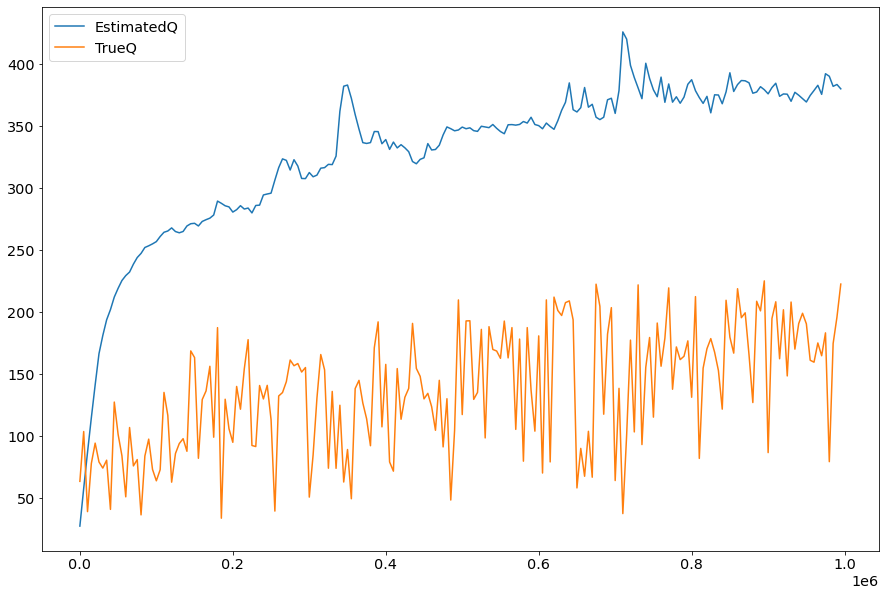

In [6]:
plt.figure(figsize=(15,10))
plt.plot(timesteps,final_df["estimated_Q_mean"],label = "EstimatedQ")
plt.plot(timesteps,final_df["True_Q_mean"],label = "TrueQ")
plt.legend(loc="upper left")
plt.show()